In [1]:
#import libraries

import numpy as np

#  for dataframe
import pandas as pd 

#for data visualisation

import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
# for datetime 
import datetime


# reading the data

In [2]:
%time data =pd.read_csv(r'C:\Users\SACHIN\OneDrive\Documents\ML MODELS DATA\IPL_Matches_2008_2022.csv')

CPU times: total: 46.9 ms
Wall time: 30.2 ms


In [3]:
# data info 
ipl_data=pd.read_csv(r'C:\Users\SACHIN\OneDrive\Documents\ML MODELS DATA\IPL_Matches_2008_2022.csv')
print(ipl_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               950 non-null    int64  
 1   City             899 non-null    object 
 2   Date             950 non-null    object 
 3   Season           950 non-null    object 
 4   MatchNumber      950 non-null    object 
 5   Team1            950 non-null    object 
 6   Team2            950 non-null    object 
 7   Venue            950 non-null    object 
 8   TossWinner       950 non-null    object 
 9   TossDecision     950 non-null    object 
 10  SuperOver        946 non-null    object 
 11  WinningTeam      946 non-null    object 
 12  WonBy            950 non-null    object 
 13  Margin           932 non-null    float64
 14  method           19 non-null     object 
 15  Player_of_Match  946 non-null    object 
 16  Team1Players     950 non-null    object 
 17  Team2Players    

In [4]:
# columns of our data

In [5]:
ipl_data.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [6]:
# shape of data 
ipl_data.shape

(950, 20)

In [7]:
ipl_data.describe()

,ID,Margin
count,9.500000e+02,932.000000
mean,8.304852e+05,17.056867
std,3.375678e+05,21.633109
min,3.359820e+05,1.000000
25%,5.012612e+05,6.000000
50%,8.297380e+05,8.000000
75%,1.175372e+06,19.000000
max,1.312200e+06,146.000000


In [8]:
# count values 
ipl_data.count()

ID                 950
City               899
Date               950
Season             950
MatchNumber        950
Team1              950
Team2              950
Venue              950
TossWinner         950
TossDecision       950
SuperOver          946
WinningTeam        946
WonBy              950
Margin             932
method              19
Player_of_Match    946
Team1Players       950
Team2Players       950
Umpire1            950
Umpire2            950
dtype: int64

In [9]:
# find all null values

In [10]:
ipl_data.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [11]:
# first 3 entries in dataset
ipl_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


# Data preprocessing

### Dealing with missing values

In [12]:
ipl_data['Margin'] = ipl_data['Margin'].fillna(0)
ipl_data['WinningTeam'] = ipl_data['WinningTeam'].fillna('No Result')
ipl_data['SuperOver'] = ipl_data['SuperOver'].fillna('N')


In [13]:
city_mode = ipl_data['City'].mode()[0]
ipl_data['City'] = ipl_data['City'].fillna(city_mode)

In [14]:
city_mode = ipl_data['City'].mode()
city_mode

0    Mumbai
Name: City, dtype: object

###  Data type conversions

In [15]:

ipl_data['Date'] = pd.to_datetime(data['Date'])
ipl_data['SuperOver'] = ipl_data['SuperOver'].apply(lambda x: 'Yes' if x == 'Y' else 'No')

###  Feature engineering

In [16]:
ipl_data['Year'] = ipl_data['Date'].dt.year
ipl_data['Winning Margin'] = ipl_data['Margin'].astype(int)
ipl_data['Match Outcome'] = ipl_data['WonBy'] + " by " + ipl_data['Margin'].astype(str)

In [17]:
ipl_data.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Year,Winning Margin,Match Outcome
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,2022,7,Wickets by 7.0
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,2022,7,Wickets by 7.0


In [18]:
ipl_data.isnull().sum()

ID                   0
City                 0
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            0
WinningTeam          0
WonBy                0
Margin               0
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
Year                 0
Winning Margin       0
Match Outcome        0
dtype: int64

In [19]:
#  Drop unnecessary columns
ipl_data.drop(columns=['ID', 'Team1Players', 'Team2Players','method'], inplace=True)

In [20]:
ipl_data = ipl_data.drop(['Player_of_Match'], axis=1)


In [21]:
#  Clean categorical data
data['Team1'] = data['Team1'].str.strip()
data['Team2'] = data['Team2'].str.strip()
data['Venue'] = data['Venue'].str.strip()

In [22]:
ipl_data.head(3)

,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Umpire1,Umpire2,Year,Winning Margin,Match Outcome
0,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,No,Gujarat Titans,Wickets,7.0,CB Gaffaney,Nitin Menon,2022,7,Wickets by 7.0
1,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,No,Rajasthan Royals,Wickets,7.0,CB Gaffaney,Nitin Menon,2022,7,Wickets by 7.0
2,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,No,Royal Challengers Bangalore,Runs,14.0,J Madanagopal,MA Gough,2022,14,Runs by 14.0


# Data visualization

# 1 Match Outcome and Winning Team

## 1.1  What is the most common match outcome (Wickets/Runs)?

In [51]:
outcome=ipl_data['WonBy'].value_counts()
outcome

WonBy
Wickets      509
Runs         423
SuperOver     14
NoResults      4
Name: count, dtype: int64

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_21240\2392737020.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=outcome.index, y=outcome.values, palette='Set2')


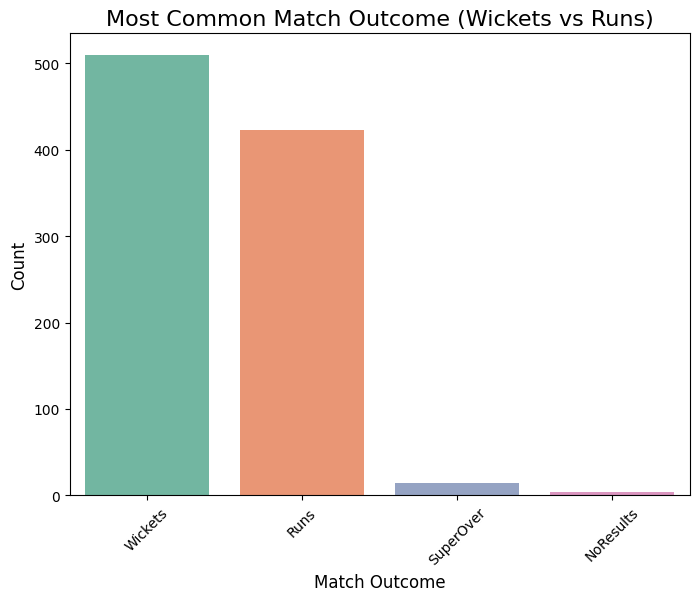

In [52]:
plt.figure(figsize=(8, 6))
sns.barplot(x=outcome.index, y=outcome.values, palette='Set2')
plt.title('Most Common Match Outcome (Wickets vs Runs)', fontsize=16)
plt.xlabel('Match Outcome', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## 1.2  Which team has won the most matches in the dataset?

In [56]:
x=ipl_data['WinningTeam'].value_counts()[:5]
x

WinningTeam
Mumbai Indians                 131
Chennai Super Kings            121
Kolkata Knight Riders          114
Royal Challengers Bangalore    109
Rajasthan Royals                96
Name: count, dtype: int64

In [58]:
most_win=x.max()  # idxmax()
most_win

131

## 1.3  How does the winning margin vary by outcome (Wickets/Runs)?


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_21240\1848748670.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Match Outcome', y='Winning Margin', data=outcome_margin, palette='Set2')


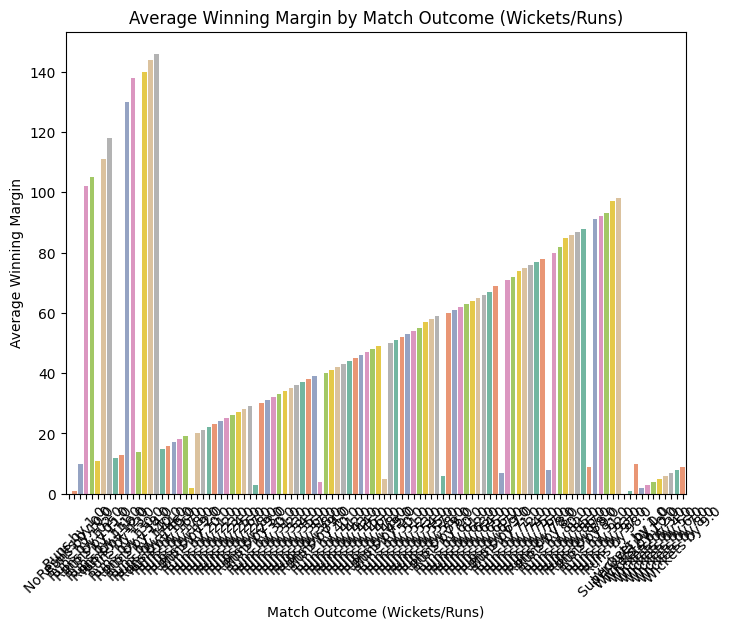

In [59]:
outcome_margin = ipl_data.groupby('Match Outcome')['Winning Margin'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Match Outcome', y='Winning Margin', data=outcome_margin, palette='Set2')
plt.title('Average Winning Margin by Match Outcome (Wickets/Runs)')
plt.ylabel('Average Winning Margin')
plt.xlabel('Match Outcome (Wickets/Runs)')
plt.xticks(rotation=45)
plt.show()

In [60]:
outcome_margin


,Match Outcome,Winning Margin
0,NoResults by 0.0,0.0
1,Runs by 1.0,1.0
2,Runs by 10.0,10.0
3,Runs by 102.0,102.0
4,Runs by 105.0,105.0
...,...,...
101,Wickets by 5.0,5.0
102,Wickets by 6.0,6.0
103,Wickets by 7.0,7.0
104,Wickets by 8.0,8.0


# 2  Performance of Teams Over the Years


## 2.1  Which teams have been performing the best across different seasons?

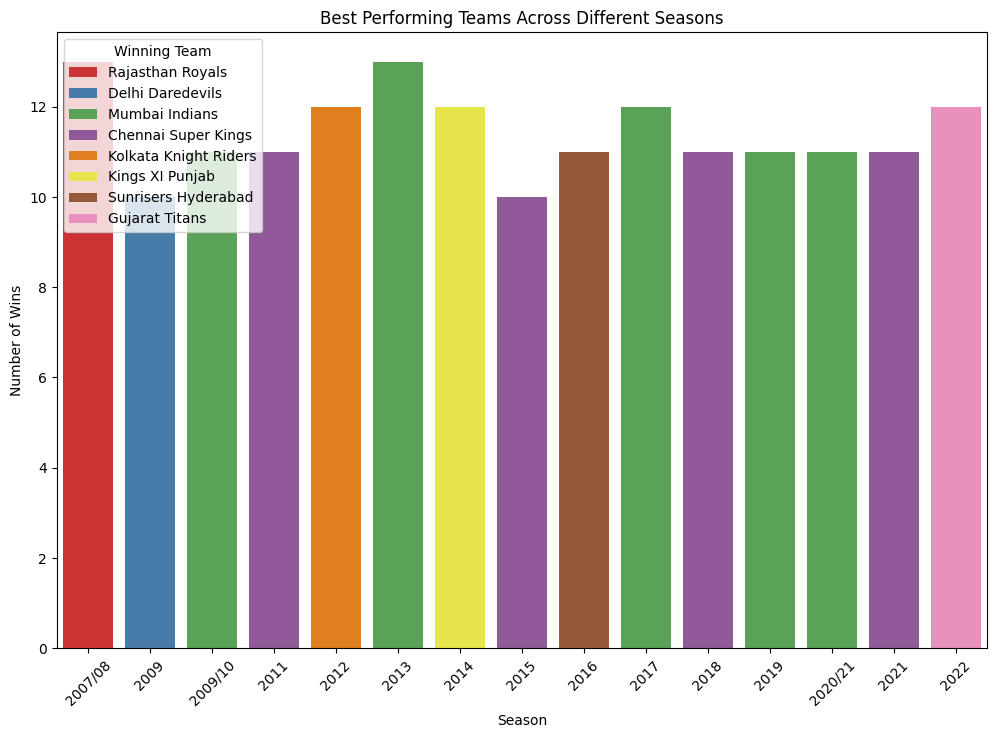

In [14]:

season_wins = ipl_data.groupby(['Season', 'WinningTeam']).size().reset_index(name='Wins')

# Find the team with the maximum wins in each season
best_performers = season_wins.loc[season_wins.groupby('Season')['Wins'].idxmax()]

# Plotting the result using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Season', y='Wins', hue='WinningTeam', data=best_performers, palette='Set1')
plt.title('Best Performing Teams Across Different Seasons')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Winning Team', loc='upper left')
plt.show()


In [18]:
best_performers

,Season,WinningTeam,Wins
6,2007/08,Rajasthan Royals,13
10,2009,Delhi Daredevils,10
21,2009/10,Mumbai Indians,11
24,2011,Chennai Super Kings,11
39,2012,Kolkata Knight Riders,12
48,2013,Mumbai Indians,13
55,2014,Kings XI Punjab,12
61,2015,Chennai Super Kings,10
77,2016,Sunrisers Hyderabad,11
82,2017,Mumbai Indians,12


In [63]:
best_performers

,Season,WinningTeam,Wins
6,2007/08,Rajasthan Royals,13
10,2009,Delhi Daredevils,10
21,2009/10,Mumbai Indians,11
24,2011,Chennai Super Kings,11
39,2012,Kolkata Knight Riders,12
48,2013,Mumbai Indians,13
55,2014,Kings XI Punjab,12
61,2015,Chennai Super Kings,10
77,2016,Sunrisers Hyderabad,11
82,2017,Mumbai Indians,12


## 2.2  How does the number of matches played by each team change over the years?

In [23]:
# Count matches played by each team as Team1
matches_team1 = ipl_data.groupby(['Year', 'Team1']).size().reset_index(name='Matches Played')
# Count matches played by each team as Team2
matches_team2 = ipl_data.groupby(['Year', 'Team2']).size().reset_index(name='Matches Played')

matches_team1.rename(columns={'Team1': 'Team'}, inplace=True)
matches_team2.rename(columns={'Team2': 'Team'}, inplace=True)

# Combine matches played as Team1 and Team2
matches_total = pd.concat([matches_team1, matches_team2])

# Group by Year and Team to get the total matches played
matches_total = matches_total.groupby(['Year', 'Team'])['Matches Played'].sum().reset_index()

matches_total.sort_values(['Year', 'Team'], inplace=True)
matches_total


,Year,Team,Matches Played
0,2008,Chennai Super Kings,16
1,2008,Deccan Chargers,14
2,2008,Delhi Daredevils,14
3,2008,Kings XI Punjab,15
4,2008,Kolkata Knight Riders,13
...,...,...,...
121,2022,Mumbai Indians,14
122,2022,Punjab Kings,14
123,2022,Rajasthan Royals,17
124,2022,Royal Challengers Bangalore,16


In [27]:
matches_team2

,Year,Team,Matches Played
0,2008,Chennai Super Kings,7
1,2008,Deccan Chargers,7
2,2008,Delhi Daredevils,7
3,2008,Kings XI Punjab,8
4,2008,Kolkata Knight Riders,6
...,...,...,...
120,2022,Mumbai Indians,9
121,2022,Punjab Kings,5
122,2022,Rajasthan Royals,4
123,2022,Royal Challengers Bangalore,7


## 2.3  What is the winning percentage of each team by season?

In [30]:
ipl_data.head(3)

,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Umpire1,Umpire2,Year,Winning Margin,Match Outcome
0,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,No,Gujarat Titans,Wickets,7.0,NaN,CB Gaffaney,Nitin Menon,2022,7,Wickets by 7.0
1,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,No,Rajasthan Royals,Wickets,7.0,NaN,CB Gaffaney,Nitin Menon,2022,7,Wickets by 7.0
2,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,No,Royal Challengers Bangalore,Runs,14.0,NaN,J Madanagopal,MA Gough,2022,14,Runs by 14.0


In [28]:
# calculate number of matches played by team 1 and team 2
matches_team1=ipl_data.groupby(['Year','Team1']).size().reset_index(name='Match played')
matches_team2=ipl_data.groupby(['Year','Team2']).size().reset_index(name='Match played')

# change column name
matches_team1.rename(columns={'Team1':'Team'},inplace=True)
matches_team2.rename(columns={'Team2':'Team'},inplace=True)

# concatinate data
matches_played=pd.concat([matches_team1,matches_team2])
# Group by Year and Team to get the total matches played
matches_total = matches_total.groupby(['Year', 'Team'])['Matches Played'].sum().reset_index()

matches_total.sort_values(['Year','Team'],inplace=True)
matches_total

,Year,Team,Matches Played
0,2008,Chennai Super Kings,16
1,2008,Deccan Chargers,14
2,2008,Delhi Daredevils,14
3,2008,Kings XI Punjab,15
4,2008,Kolkata Knight Riders,13
...,...,...,...
121,2022,Mumbai Indians,14
122,2022,Punjab Kings,14
123,2022,Rajasthan Royals,17
124,2022,Royal Challengers Bangalore,16


In [29]:
# now calculate matches won by each team in seasons
matches_won=ipl_data.groupby(['Year','WinningTeam']).size().reset_index(name='wins')
# rename columns
matches_won.rename(columns={'WinningTeam':'Team'},inplace=True)

In [33]:
team_stat

,Year,Team,Matches Played,wins
0,2008,Chennai Super Kings,16.0,9.0
1,2008,Deccan Chargers,14.0,2.0
2,2008,Delhi Daredevils,14.0,7.0
3,2008,Kings XI Punjab,15.0,10.0
4,2008,Kolkata Knight Riders,13.0,6.0
...,...,...,...,...
124,2022,Mumbai Indians,14.0,4.0
125,2022,Punjab Kings,14.0,7.0
126,2022,Rajasthan Royals,17.0,10.0
127,2022,Royal Challengers Bangalore,16.0,9.0


In [31]:
# merge the dataset
team_stat=pd.concat([matches_total,matches_won])

In [32]:
team_stat=team_stat.groupby(['Year','Team'])[['Matches Played','wins']].sum().reset_index()

In [61]:

team_stat['winning percentage']=(team_stat['wins']/team_stat['Matches Played'])*100

In [35]:
mumbai_indian

,Year,Team,Matches Played,wins
5,2008,Mumbai Indians,14.0,7.0
13,2009,Mumbai Indians,13.0,5.0
21,2010,Mumbai Indians,16.0,11.0
30,2011,Mumbai Indians,16.0,10.0
40,2012,Mumbai Indians,17.0,10.0
48,2013,Mumbai Indians,19.0,13.0
57,2014,Mumbai Indians,15.0,7.0
65,2015,Mumbai Indians,16.0,10.0
74,2016,Mumbai Indians,14.0,7.0
82,2017,Mumbai Indians,17.0,12.0


In [34]:
# fetch winning percentage of mumbai indians
mumbai_indian=team_stat[team_stat['Team']=='Mumbai Indians']

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_11340\3440561300.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




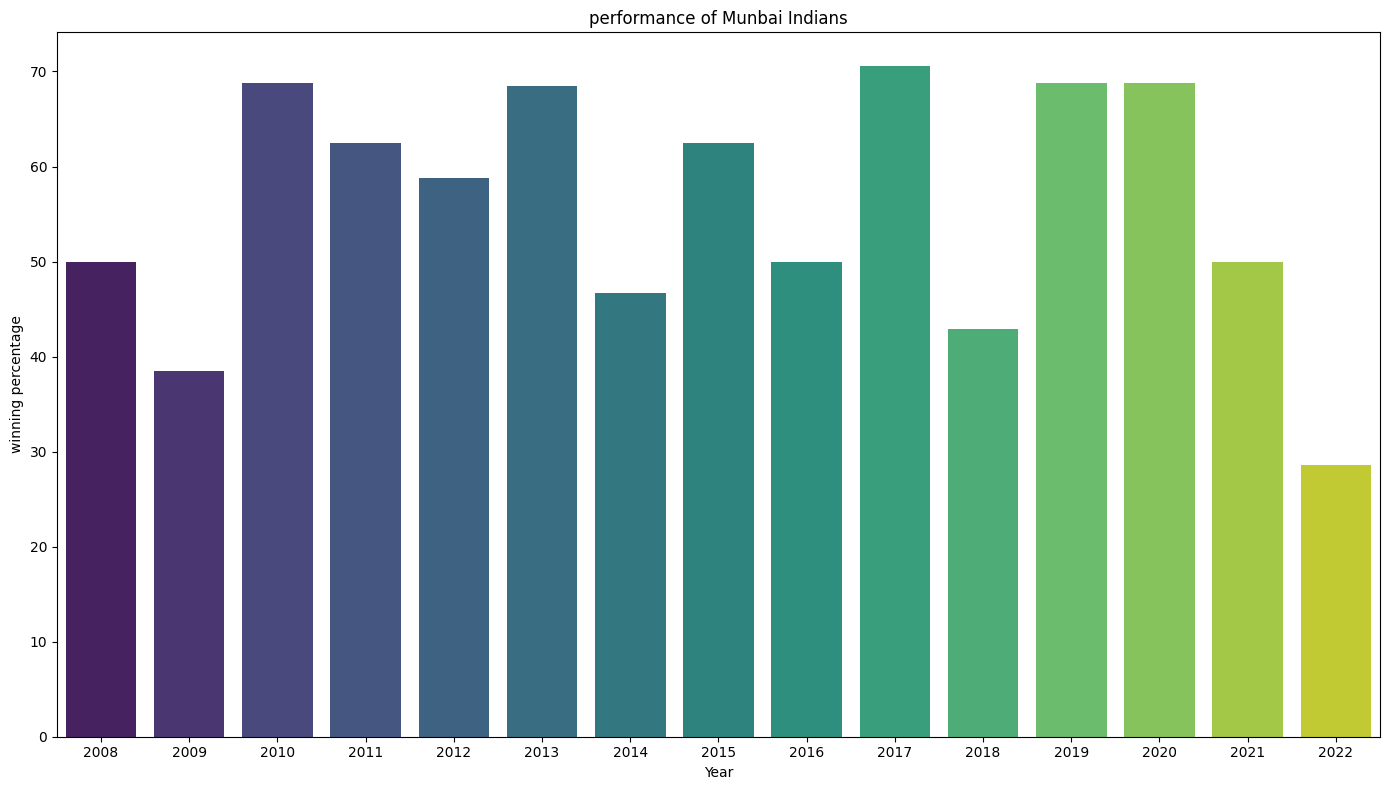

In [69]:
# plot 'mumbai indians' winning percentage
plt.figure(figsize=(14,8))
sns.barplot(x=mumbai_indian['Year'],y=mumbai_indian['winning percentage'],data=mumbai_indian,palette='viridis')
plt.title("performance of Munbai Indians")
plt.xlabel("Year")
plt.ylabel('winning percentage')
plt.tight_layout()
plt.show()

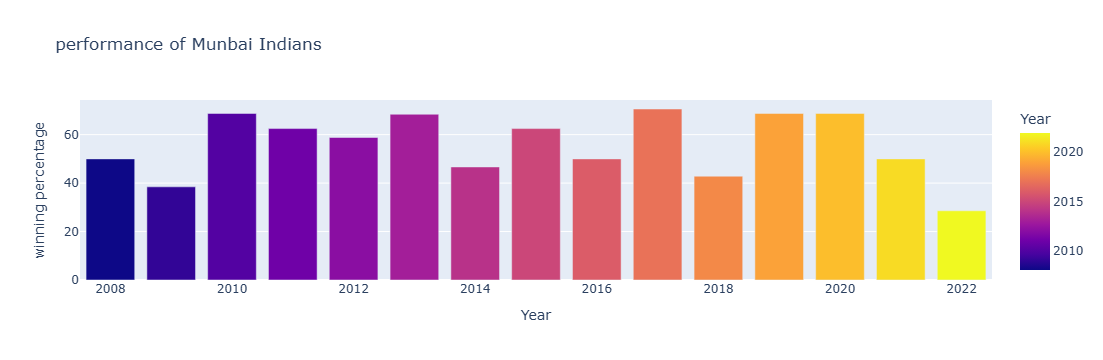

In [71]:
import plotly.express as px
fig=px.bar(mumbai_indian,x=mumbai_indian['Year'],y=mumbai_indian['winning percentage'],
          title='performance of Munbai Indians',color='Year',
          height=700)
fig.show()

# 3. Toss Analysis


## 3.1  Does winning the toss influence the match outcome?

In [39]:
toss_stats

,TossWinMatchWin,Count,Percentage
0,Won Toss & Match,489,51.473684
1,Won Toss Only,461,48.526316


    TossWinMatchWin  Count  Percentage
0  Won Toss & Match    489   51.473684
1     Won Toss Only    461   48.526316


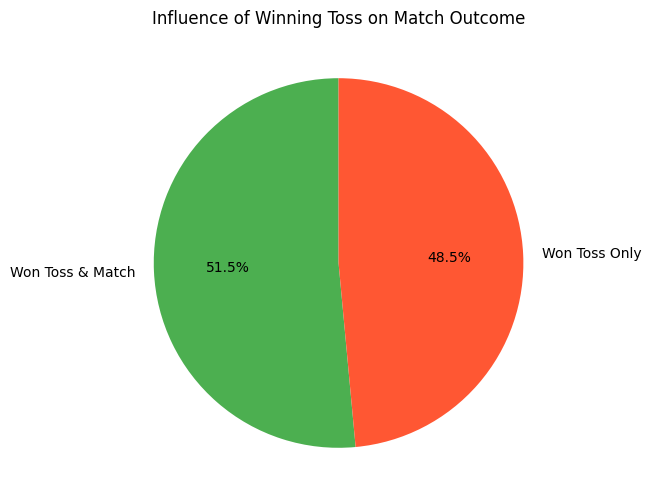

In [36]:
# Create a new column to check if TossWinner is the same as WinningTeam
ipl_data['TossWinMatchWin'] = ipl_data['TossWinner'] == ipl_data['WinningTeam']

# Count matches where toss-winning team also won the match
toss_stats = ipl_data['TossWinMatchWin'].value_counts().reset_index()
toss_stats.columns = ['TossWinMatchWin', 'Count']

# Calculate percentages
toss_stats['Percentage'] = (toss_stats['Count'] / toss_stats['Count'].sum()) * 100

# Rename for better understanding
toss_stats['TossWinMatchWin'] = toss_stats['TossWinMatchWin'].map({True: 'Won Toss & Match', False: 'Won Toss Only'})

print(toss_stats)
plt.figure(figsize=(8, 6))
plt.pie(toss_stats['Percentage'], labels=toss_stats['TossWinMatchWin'], autopct='%1.1f%%', startangle=90, colors=['#4CAF50', '#FF5733'])
plt.title('Influence of Winning Toss on Match Outcome')
plt.show()


In [73]:
toss_stats

,TossWinMatchWin,Count,Percentage
0,Won Toss & Match,489,51.473684
1,Won Toss Only,461,48.526316


## 3.2 What is the distribution of toss winners across all matches?

In [76]:
toss_winners = ipl_data['TossWinner'].value_counts().reset_index()
toss_winners.columns = ['Team', 'Toss Wins']

toss_winners = toss_winners.sort_values(by='Toss Wins', ascending=False)
print(toss_winners)

                           Team  Toss Wins
0                Mumbai Indians        123
1         Kolkata Knight Riders        114
2           Chennai Super Kings        109
3   Royal Challengers Bangalore        105
4              Rajasthan Royals         99
5               Kings XI Punjab         85
6              Delhi Daredevils         80
7           Sunrisers Hyderabad         74
8               Deccan Chargers         43
9                Delhi Capitals         36
10                Pune Warriors         20
11                Gujarat Lions         15
12               Gujarat Titans         10
13                 Punjab Kings          9
14         Kochi Tuskers Kerala          8
15         Lucknow Super Giants          7
16      Rising Pune Supergiants          7
17       Rising Pune Supergiant          6


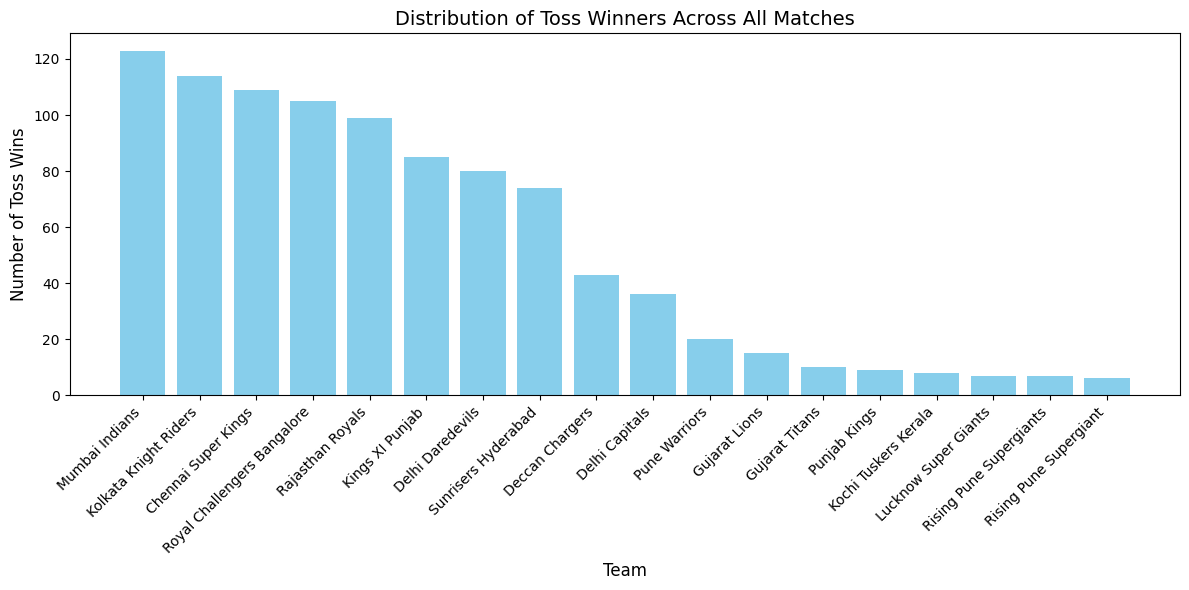

In [77]:
plt.figure(figsize=(12, 6))
plt.bar(toss_winners['Team'], toss_winners['Toss Wins'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Toss Winners Across All Matches', fontsize=14)
plt.xlabel('Team', fontsize=12)
plt.ylabel('Number of Toss Wins', fontsize=12)
plt.tight_layout()
plt.show()

## 3.3  How does the toss decision (Bat/Field) affect the winning team?

  Toss Decision  Matches Won  Winning Percentage
0         field          330           34.736842
1           bat          159           16.736842


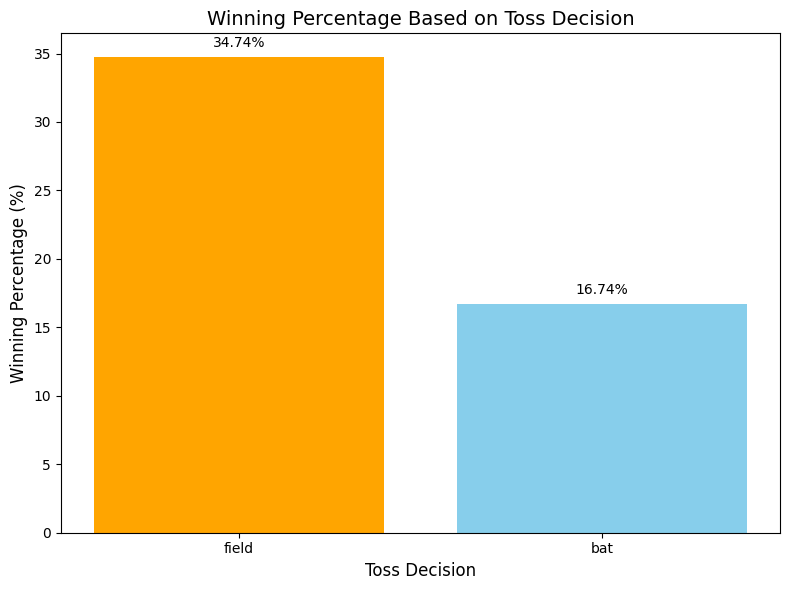

In [82]:
toss_winning_matches = ipl_data[ipl_data['TossWinner'] == ipl_data['WinningTeam']]

# Count matches won for each toss decision
decision_effect = toss_winning_matches['TossDecision'].value_counts().reset_index()
decision_effect.columns = ['Toss Decision', 'Matches Won']

# Calculate the percentage of matches won
decision_effect['Winning Percentage'] = (decision_effect['Matches Won'] / len(ipl_data)) * 100
print(decision_effect)

plt.figure(figsize=(8, 6))
plt.bar(decision_effect['Toss Decision'], decision_effect['Winning Percentage'], color=['orange', 'skyblue'])
plt.title('Winning Percentage Based on Toss Decision', fontsize=14)
plt.ylabel('Winning Percentage (%)', fontsize=12)
plt.xlabel('Toss Decision', fontsize=12)
plt.tight_layout()

for i,values in enumerate(decision_effect['Winning Percentage']):
    plt.text(i,values+0.5,f"{values:.2f}%",ha='center',va='bottom',color='black')
plt.show()


# 4. Super Over Analysis

## 4.1  How many matches have been decided by a Super Over?

In [41]:
super_over=ipl_data[ipl_data['SuperOver']=='Yes']
super_over.shape

(14, 19)

In [42]:
print(f"number of matches decided by super over :{super_over.shape[0]} matches")

number of matches decided by super over :14 matches


## 4.2  Which teams are more likely to participate in a Super Over?

In [45]:
super_over_teams

,Team,SuperOver
0,Chennai Super Kings,1
1,Delhi Capitals,3
2,Delhi Daredevils,1
3,Gujarat Lions,1
4,Kings XI Punjab,4
5,Kolkata Knight Riders,4
6,Mumbai Indians,4
7,Rajasthan Royals,3
8,Royal Challengers Bangalore,3
9,Sunrisers Hyderabad,4


In [43]:
team1=super_over.groupby('Team1')['SuperOver'].size().reset_index()
team2=super_over.groupby('Team2')['SuperOver'].size().reset_index()

# change column name
team1.rename(columns={'Team1':'Team'},inplace=True)
team2.rename(columns={'Team2':'Team'},inplace=True)

# concat team1 and team2
super_over_teams=pd.concat([team1,team2])

# group data by team
super_over_teams=super_over_teams.groupby('Team')['SuperOver'].sum().reset_index()

C:\Users\SACHIN\AppData\Local\Temp\ipykernel_22476\3864773453.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=super_over_teams,x='Team',y='SuperOver',palette='viridis')


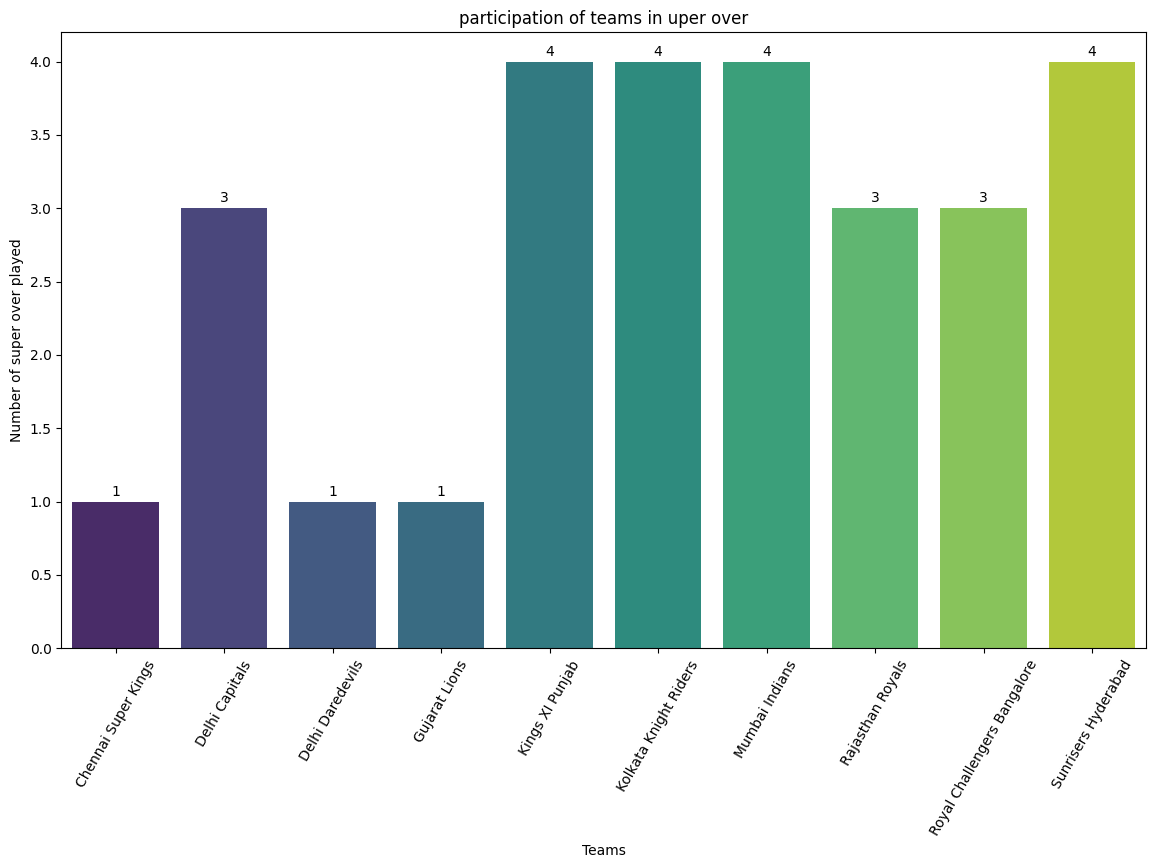

In [35]:
plt.figure(figsize=(14,8))
sns.barplot(data=super_over_teams,x='Team',y='SuperOver',palette='viridis')
plt.title('participation of teams in uper over')
plt.xlabel('Teams')
plt.ylabel('Number of super over played')
plt.xticks(rotation=60)

for i ,values in enumerate(super_over_teams['SuperOver']):
    plt.text(i,values+0.02,f"{values}",
            ha='center',va='bottom')
plt.show()

## 4.3  What is the distribution of Super Over matches across different seasons?

In [59]:
super_over=ipl_data[ipl_data['SuperOver']=='Yes']

super_over=super_over.groupby(['Year'])['SuperOver'].size().reset_index()

In [60]:
super_over

,Year,SuperOver
0,2009,1
1,2010,1
2,2013,2
3,2014,1
4,2015,1
5,2017,1
6,2019,2
7,2020,4
8,2021,1


# 5. Venue-based Insights

## 5.1  Which venue has hosted the most matches?


In [66]:
venue_data=ipl_data['Venue'].value_counts().reset_index()[:10]


C:\Users\SACHIN\AppData\Local\Temp\ipykernel_22476\3253818737.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=venue_data,x='Venue',y='count',palette='tab10')


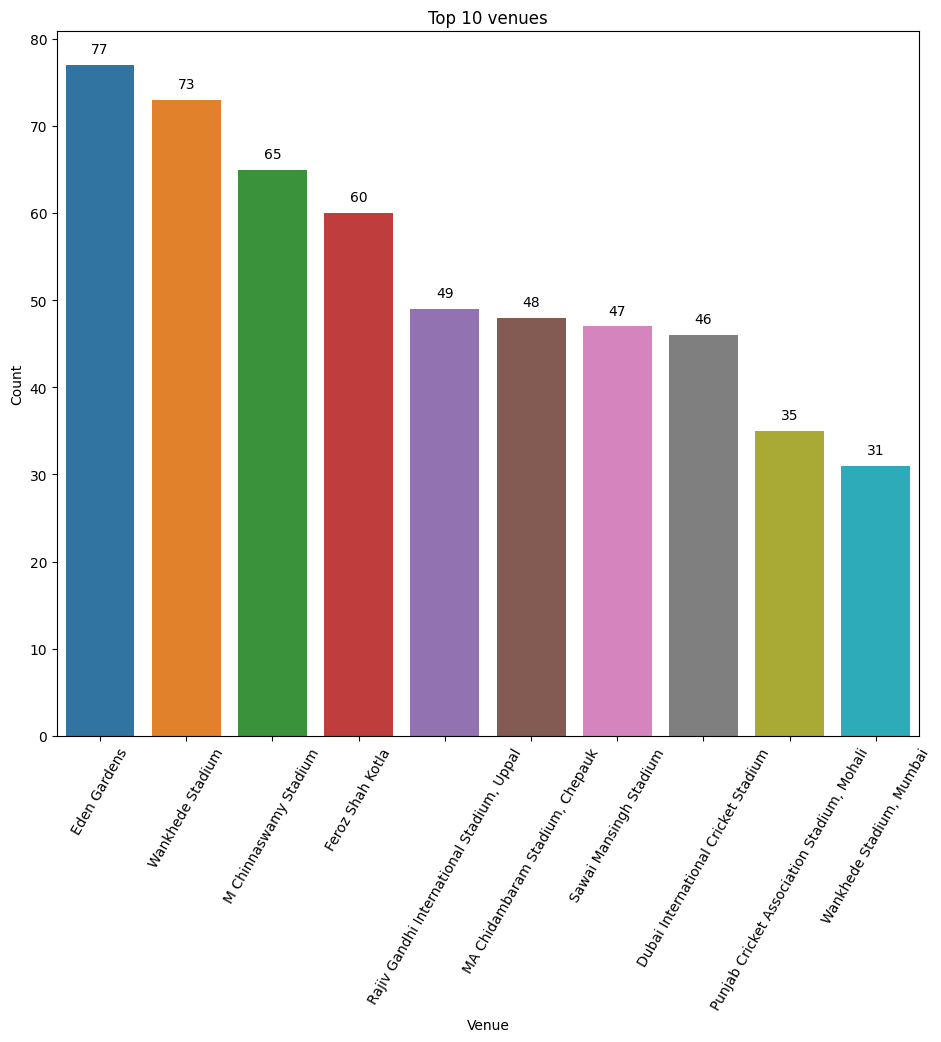

In [73]:
plt.figure(figsize=(10,8))
sns.barplot(data=venue_data,x='Venue',y='count',palette='tab10')
plt.title('Top 10 venues')
plt.xlabel('Venue')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=60)

for i,values in enumerate(venue_data['count']):
    plt.text(i,values+1,f"{values}",ha='center',va='bottom')
plt.show()

## 5.2  How does the winning team change based on the venue?

In [46]:
# Create a dictionary to map inconsistent names to standardized ones
venue_mapping = {
    "Arun Jaitley Stadium, Delhi": "Arun Jaitley Stadium",
    "Brabourne Stadium, Mumbai": "Brabourne Stadium",
    "Dr DY Patil Sports Academy, Mumbai": "Dr DY Patil Sports Academy",
    "Eden Gardens, Kolkata": "Eden Gardens",
    "MA Chidambaram Stadium, Chepauk": "MA Chidambaram Stadium",
    "MA Chidambaram Stadium, Chepauk, Chennai": "MA Chidambaram Stadium",
    "M Chinnaswamy Stadium": "M. Chinnaswamy Stadium",
    "Maharashtra Cricket Association Stadium, Pune": "Maharashtra Cricket Association Stadium",
    "Punjab Cricket Association IS Bindra Stadium, Mohali": "Punjab Cricket Association IS Bindra Stadium",
    "Rajiv Gandhi International Stadium, Uppal": "Rajiv Gandhi International Stadium",
    "Wankhede Stadium, Mumbai": "Wankhede Stadium",
}

ipl_data['Venue'] = ipl_data['Venue'].replace(venue_mapping)


In [47]:
venue_winning_team = (ipl_data.groupby(['Venue', 'WinningTeam']).size().reset_index(name='Win Count'))

most_wins_by_venue = venue_winning_team.loc[venue_winning_team.groupby('Venue')['Win Count'].idxmax()].reset_index(drop=True)

# change columns names
most_wins_by_venue.rename(columns={'Venue':'Stadium','Win Count':'number of wins'},inplace=True)
most_wins_by_venue=most_wins_by_venue.sort_values(by='number of wins',ascending=False)


In [50]:
most_wins_by_venue

,Stadium,WinningTeam,number of wins
8,Eden Gardens,Kolkata Knight Riders,45
37,Wankhede Stadium,Mumbai Indians,44
17,MA Chidambaram Stadium,Chennai Super Kings,40
29,Sawai Mansingh Stadium,Rajasthan Royals,32
26,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,30
15,M. Chinnaswamy Stadium,Royal Challengers Bangalore,29
9,Feroz Shah Kotla,Delhi Daredevils,23
25,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,18
24,Punjab Cricket Association IS Bindra Stadium,Kings XI Punjab,12
7,Dubai International Cricket Stadium,Chennai Super Kings,9


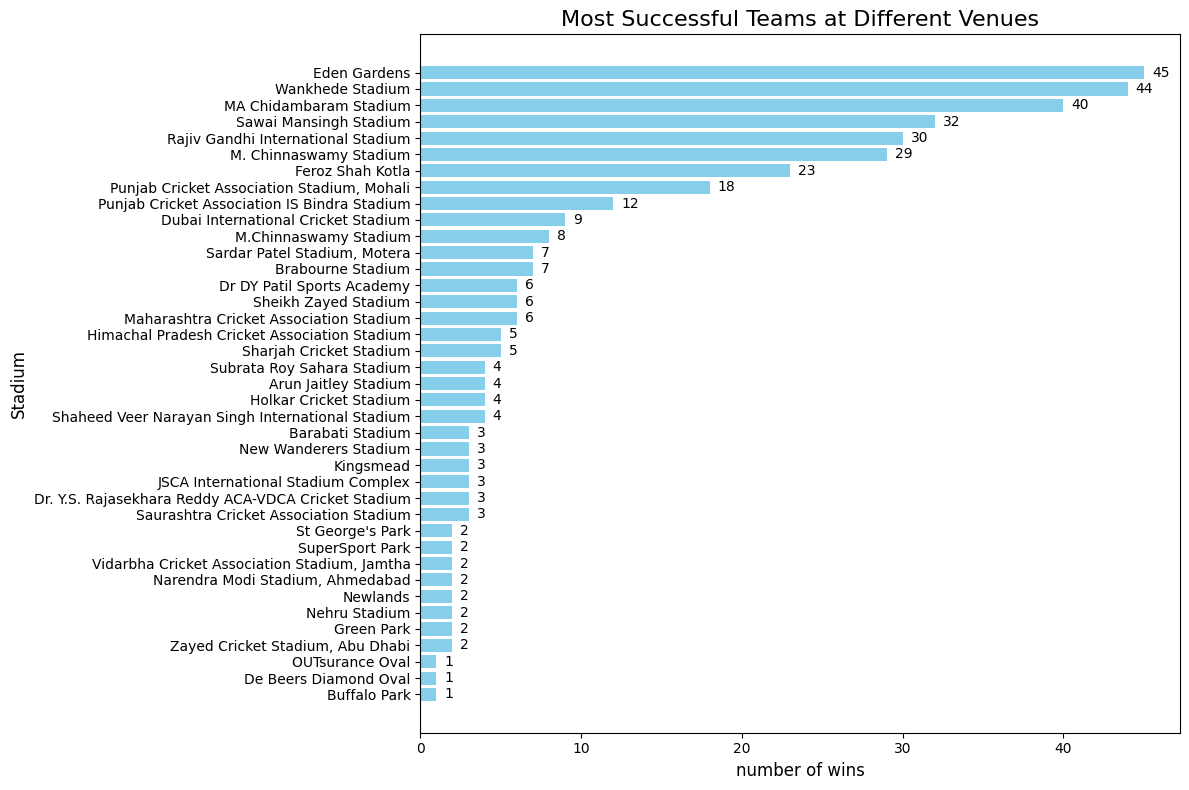

In [93]:
plt.figure(figsize=(12, 8))
plt.barh(
    most_wins_by_venue['Stadium'],
    most_wins_by_venue['number of wins'],
    color='skyblue'
)
plt.title('Most Successful Teams at Different Venues', fontsize=16)
plt.xlabel('number of wins', fontsize=12)
plt.ylabel('Stadium', fontsize=12)
plt.gca().invert_yaxis()  # Reverse the y-axis for better readability
plt.tight_layout()

for i, values in enumerate(most_wins_by_venue['number of wins']):
    plt.text(values + 0.5, i, f"{values}", ha='left', va='center') 

plt.show()

In [89]:
most_wins_by_venue

,Stadium,WinningTeam,number of wins
8,Eden Gardens,Kolkata Knight Riders,45
37,Wankhede Stadium,Mumbai Indians,44
17,MA Chidambaram Stadium,Chennai Super Kings,40
29,Sawai Mansingh Stadium,Rajasthan Royals,32
26,Rajiv Gandhi International Stadium,Sunrisers Hyderabad,30
15,M. Chinnaswamy Stadium,Royal Challengers Bangalore,29
9,Feroz Shah Kotla,Delhi Daredevils,23
25,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,18
24,Punjab Cricket Association IS Bindra Stadium,Kings XI Punjab,12
7,Dubai International Cricket Stadium,Chennai Super Kings,9


# 6. Seasonal Trends

## 6.1  How has the total number of matches increased or decreased over the years?


In [95]:
matches_per_year = ipl_data.groupby('Year').size().reset_index(name='Total Matches')

In [96]:
matches_per_year

,Year,Total Matches
0,2008,58
1,2009,57
2,2010,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


## 6.2  Is there a trend in winning margins (Wickets/Runs) across different seasons?

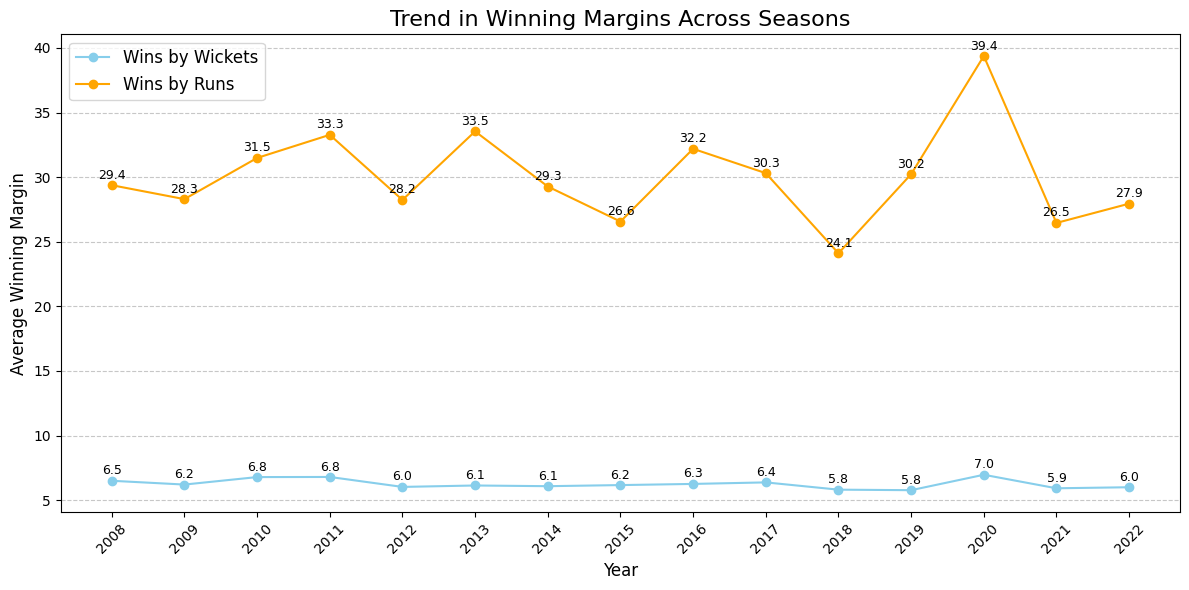

In [105]:
# Grouping data by Year and WonBy to calculate average winning margins
winning_margins = ipl_data.groupby(['Year', 'WonBy'])['Margin'].mean().reset_index()

# Separate data for Wickets and Runs
wickets_margin = winning_margins[winning_margins['WonBy'] == 'Wickets']
runs_margin = winning_margins[winning_margins['WonBy'] == 'Runs']

plt.figure(figsize=(12, 6))
plt.plot(wickets_margin['Year'], wickets_margin['Margin'], marker='o', label='Wins by Wickets', color='skyblue')
plt.plot(runs_margin['Year'], runs_margin['Margin'], marker='o', label='Wins by Runs', color='orange')
plt.title('Trend in Winning Margins Across Seasons', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Winning Margin', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(wickets_margin['Year'], rotation=45)
plt.tight_layout()

for i, value in enumerate(wickets_margin['Margin']):
    plt.text(wickets_margin['Year'].iloc[i], value + 0.5, f"{value:.1f}", ha='center', fontsize=9)
for i, value in enumerate(runs_margin['Margin']):
    plt.text(runs_margin['Year'].iloc[i], value + 0.5, f"{value:.1f}", ha='center', fontsize=9)


plt.show()


# 7  Team Performance in Different Cities

## 7.1  How do teams perform in different cities (winning percentage)?

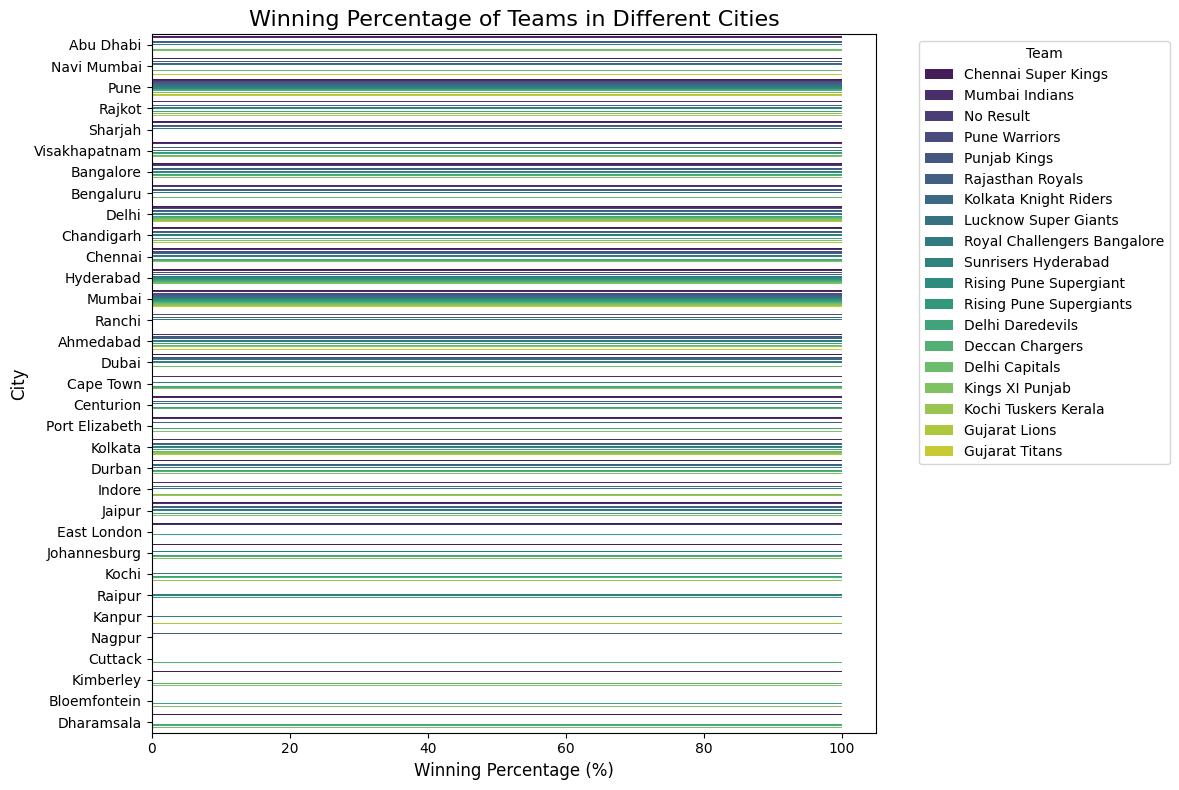

In [106]:
# Group by 'Team' and 'City' and calculate number of wins
team_city_performance = ipl_data.groupby(['WinningTeam', 'City']).size().reset_index(name='Matches Played')

# Calculate wins by team and city
team_city_wins = ipl_data[ipl_data['WinningTeam'] == ipl_data['WinningTeam']].groupby(['WinningTeam', 'City']).size().reset_index(name='Matches Won')

# Merge the two DataFrames to get the total matches played and won by each team in each city
team_city_performance = pd.merge(team_city_performance, team_city_wins, on=['WinningTeam', 'City'], how='left')

# Calculate winning percentage
team_city_performance['Winning Percentage'] = (team_city_performance['Matches Won'] / team_city_performance['Matches Played']) * 100

# Sort values for better readability
team_city_performance = team_city_performance.sort_values(by='Winning Percentage', ascending=False)

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Winning Percentage', y='City', hue='WinningTeam', data=team_city_performance, palette='viridis')
plt.title('Winning Percentage of Teams in Different Cities', fontsize=16)
plt.xlabel('Winning Percentage (%)', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
plt.tight_layout()
plt.show()


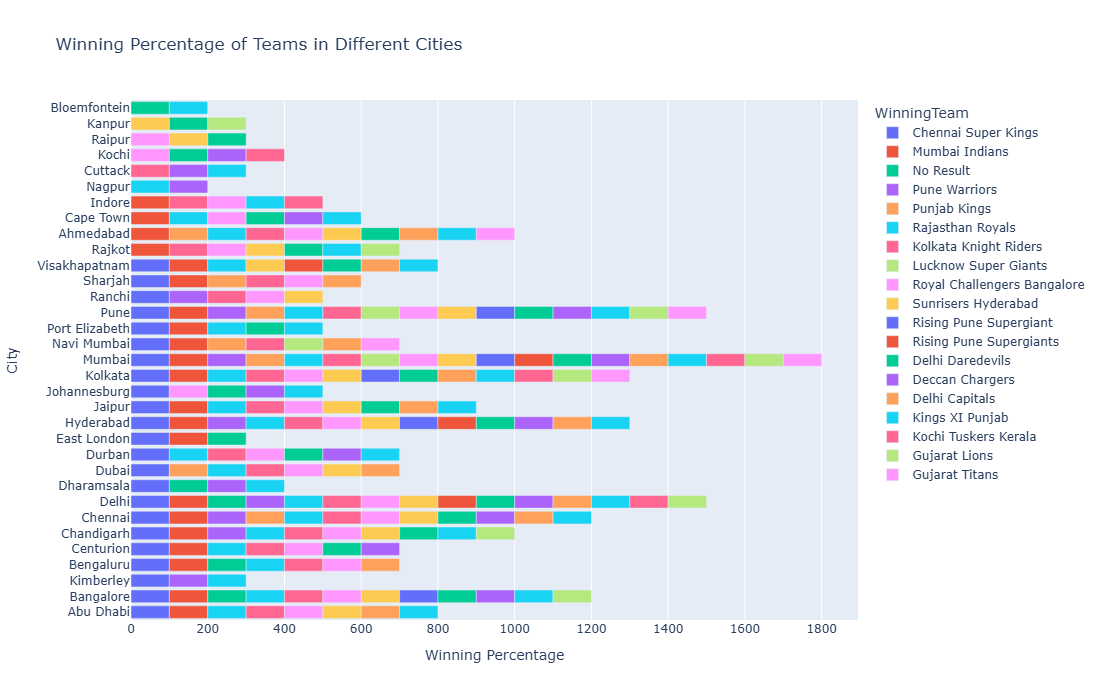

In [109]:
import plotly.express as px
fig=px.bar(team_city_performance,x=team_city_performance['Winning Percentage'],y=team_city_performance['City'],
          color='WinningTeam',title='Winning Percentage of Teams in Different Cities',height=700)
fig.show()

In [112]:
# Count the total number of matches each team played in each city
total_matches = ipl_data.groupby(['Team1', 'City']).size().reset_index(name='Matches Played')
total_matches_2 = ipl_data.groupby(['Team2', 'City']).size().reset_index(name='Matches Played')  # For the second team

# Merge to get total matches played by each team in each city
total_matches = pd.concat([total_matches, total_matches_2], axis=0)
total_matches = total_matches.groupby(['Team1', 'City'])['Matches Played'].sum().reset_index()

# Count the wins for each team in each city
team_wins = ipl_data[ipl_data['WinningTeam'] == ipl_data['WinningTeam']].groupby(['WinningTeam', 'City']).size().reset_index(name='Matches Won')

# Merge total matches and wins
team_city_performance = pd.merge(total_matches, team_wins, left_on=['Team1', 'City'], right_on=['WinningTeam', 'City'], how='left')

# Calculate winning percentage
team_city_performance['Winning Percentage'] = (team_city_performance['Matches Won'] / team_city_performance['Matches Played']) * 100

# Display the results
team_city_performance


,Team1,City,Matches Played,WinningTeam,Matches Won,Winning Percentage
0,Chennai Super Kings,Abu Dhabi,4,Chennai Super Kings,4.0,100.000000
1,Chennai Super Kings,Bangalore,1,Chennai Super Kings,4.0,400.000000
2,Chennai Super Kings,Cape Town,1,NaN,NaN,NaN
3,Chennai Super Kings,Centurion,3,Chennai Super Kings,2.0,66.666667
4,Chennai Super Kings,Chandigarh,1,Chennai Super Kings,3.0,300.000000
...,...,...,...,...,...,...
164,Sunrisers Hyderabad,Kolkata,2,Sunrisers Hyderabad,2.0,100.000000
165,Sunrisers Hyderabad,Mumbai,12,Sunrisers Hyderabad,16.0,133.333333
166,Sunrisers Hyderabad,Pune,1,Sunrisers Hyderabad,1.0,100.000000
167,Sunrisers Hyderabad,Sharjah,1,NaN,NaN,NaN
